In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [29]:
link = '/Users/selinwork/Documents/Ironhack/Ironhack_Week_6/project-4-cv/bone-fracture/Bone_Fracture_Binary_Classification'

<h2 style="color: #FF6347;">Data Extraction</h2>

In [4]:
data_path = link
print(data_path)

/Users/selinwork/Documents/Ironhack/Ironhack_Week_6/project-4-cv/bone-fracture/Bone_Fracture_Binary_Classification


<h3 style="color: #FF6347;">Train-Test-Val Datasets</h3>

In [6]:
train_dir = os.path.join(data_path, 'train')
validation_dir = os.path.join(data_path, 'val')
test_dir = os.path.join(data_path, 'test')

<h2 style="color: #FF6347;">Hyperparatmeters</h2>

In [7]:
batch_size = 32
img_size = (160,160)
img_shape = img_size + (3,)
autotune = tf.data.AUTOTUNE

<h3 style="color: #FF6347;">Processing Test-Val Test:</h3>

In [ ]:
def load_dataset(directory):
    try:
        return tf.keras.utils.image_dataset_from_directory(directory, shuffle=True, batch_size=batch_size, image_size=img_size)
    except Exception as e:
        print(f"Error loading dataset from {directory}: {e}")
        return None
    
def remove_corrupted_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                img = tf.io.read_file(file_path)
                img = tf.image.decode_jpeg(img)
            except:
                print(f"Removing corrupted image: {file_path}")
                os.remove(file_path)

In [9]:
remove_corrupted_images(train_dir)
remove_corrupted_images(validation_dir)
remove_corrupted_images(test_dir)

2025-01-16 14:56:41.018819: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid
2025-01-16 14:56:41.202518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid
2025-01-16 14:56:41.326446: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-16 14:56:42.545401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-16 14:56:43.192272: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2025-01-16 14:56:44.085283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid
2025-01-16 14:56:44.305545: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-16 14:56:44.681352: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 414/454
2025-01-16 14:56:44.681401: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is ab

Removing corrupted image: /Users/selinwork/Documents/Ironhack/Ironhack_Week_6/project-4-cv/bone-fracture/Bone_Fracture_Binary_Classification/train/not fractured/IMG0004143.jpg


2025-01-16 14:56:45.045557: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 446/454
2025-01-16 14:56:45.045573: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INVALID_ARGUMENT: jpeg::Uncompress failed. Invalid JPEG data or crop window.


Removing corrupted image: /Users/selinwork/Documents/Ironhack/Ironhack_Week_6/project-4-cv/bone-fracture/Bone_Fracture_Binary_Classification/train/not fractured/IMG0004347.jpg
Removing corrupted image: /Users/selinwork/Documents/Ironhack/Ironhack_Week_6/project-4-cv/bone-fracture/Bone_Fracture_Binary_Classification/train/not fractured/IMG0004134.jpg
Removing corrupted image: /Users/selinwork/Documents/Ironhack/Ironhack_Week_6/project-4-cv/bone-fracture/Bone_Fracture_Binary_Classification/train/not fractured/IMG0004308.jpg


2025-01-16 14:56:45.395545: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 414/454
2025-01-16 14:56:45.593274: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 446/454
2025-01-16 14:56:45.593440: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INVALID_ARGUMENT: jpeg::Uncompress failed. Invalid JPEG data or crop window.
2025-01-16 14:56:47.270599: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 446/454
2025-01-16 14:56:47.288062: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 446/454


Removing corrupted image: /Users/selinwork/Documents/Ironhack/Ironhack_Week_6/project-4-cv/bone-fracture/Bone_Fracture_Binary_Classification/train/not fractured/IMG0004148.jpg
Removing corrupted image: /Users/selinwork/Documents/Ironhack/Ironhack_Week_6/project-4-cv/bone-fracture/Bone_Fracture_Binary_Classification/train/not fractured/IMG0004149.jpg


2025-01-16 14:56:47.911617: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2025-01-16 14:56:48.847475: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 414/454
2025-01-16 14:56:48.966175: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 446/454
2025-01-16 14:56:48.966191: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INVALID_ARGUMENT: jpeg::Uncompress failed. Invalid JPEG data or crop window.


Removing corrupted image: /Users/selinwork/Documents/Ironhack/Ironhack_Week_6/project-4-cv/bone-fracture/Bone_Fracture_Binary_Classification/val/not fractured/IMG0004143.jpg
Removing corrupted image: /Users/selinwork/Documents/Ironhack/Ironhack_Week_6/project-4-cv/bone-fracture/Bone_Fracture_Binary_Classification/val/not fractured/IMG0004347.jpg


2025-01-16 14:56:49.084734: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 414/454
2025-01-16 14:56:49.151219: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 446/454


Removing corrupted image: /Users/selinwork/Documents/Ironhack/Ironhack_Week_6/project-4-cv/bone-fracture/Bone_Fracture_Binary_Classification/val/not fractured/IMG0004134.jpg
Removing corrupted image: /Users/selinwork/Documents/Ironhack/Ironhack_Week_6/project-4-cv/bone-fracture/Bone_Fracture_Binary_Classification/val/not fractured/IMG0004308.jpg


2025-01-16 14:56:49.750750: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 446/454
2025-01-16 14:56:49.753482: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 446/454


Removing corrupted image: /Users/selinwork/Documents/Ironhack/Ironhack_Week_6/project-4-cv/bone-fracture/Bone_Fracture_Binary_Classification/val/not fractured/IMG0004148.jpg
Removing corrupted image: /Users/selinwork/Documents/Ironhack/Ironhack_Week_6/project-4-cv/bone-fracture/Bone_Fracture_Binary_Classification/val/not fractured/IMG0004149.jpg
Removing corrupted image: /Users/selinwork/Documents/Ironhack/Ironhack_Week_6/project-4-cv/bone-fracture/Bone_Fracture_Binary_Classification/test/.DS_Store


2025-01-16 14:56:50.413928: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 414/454
2025-01-16 14:56:50.542314: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 446/454


Removing corrupted image: /Users/selinwork/Documents/Ironhack/Ironhack_Week_6/project-4-cv/bone-fracture/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004143.jpg
Removing corrupted image: /Users/selinwork/Documents/Ironhack/Ironhack_Week_6/project-4-cv/bone-fracture/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004347.jpg


2025-01-16 14:56:50.680877: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 414/454
2025-01-16 14:56:50.680893: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INVALID_ARGUMENT: jpeg::Uncompress failed. Invalid JPEG data or crop window.
2025-01-16 14:56:50.756602: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 446/454


Removing corrupted image: /Users/selinwork/Documents/Ironhack/Ironhack_Week_6/project-4-cv/bone-fracture/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004134.jpg
Removing corrupted image: /Users/selinwork/Documents/Ironhack/Ironhack_Week_6/project-4-cv/bone-fracture/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004308.jpg


2025-01-16 14:56:51.393961: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 446/454
2025-01-16 14:56:51.396665: E tensorflow/core/lib/jpeg/jpeg_mem.cc:329] Premature end of JPEG data. Stopped at line 446/454


Removing corrupted image: /Users/selinwork/Documents/Ironhack/Ironhack_Week_6/project-4-cv/bone-fracture/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004148.jpg
Removing corrupted image: /Users/selinwork/Documents/Ironhack/Ironhack_Week_6/project-4-cv/bone-fracture/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004149.jpg


In [10]:
train_dataset = load_dataset(train_dir)
validation_dataset = load_dataset(validation_dir)
test_dataset = load_dataset(test_dir)

Found 9240 files belonging to 2 classes.
Found 823 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [11]:
train_dataset = train_dataset.prefetch(buffer_size=autotune)
validation_dataset = validation_dataset.prefetch(buffer_size=autotune)
test_dataset = test_dataset.prefetch(buffer_size=autotune)

In [12]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

<h2 style="color: #FF6347;">CNN Model:</h2>

In [13]:
base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape, include_top=False, weights='imagenet')

In [14]:
base_model.trainable = False

In [15]:
inputs = tf.keras.Input(shape=img_shape)
x = inputs
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
x = base_model(x, training=False)

In [16]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D() # layer object

# Apply the layer to MobileNetV2
x = global_average_layer(x)
# x = tf.keras.layers.Dropout(0.2)(x) ### Optional: Add a dropout layer

prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid') # layer object
# Apply Fully Connected Layer to predict the class
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [17]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [19]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=batch_size, # Learning rate will decrease every batch
    decay_rate=0.8) # rate of decrease means 90% of the learning rate is decreased

In [20]:
# Compile the model structure for training
base_learning_rate = 0.1
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), # Adam deals with gradient descent
              loss=tf.keras.losses.BinaryCrossentropy(), # measures the difference between two probability distributions
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5, name='accuracy')]) # calculates how often predictions match binary labels

<h3 style="color: #FF6347;">Early Stop, Epochs & Saving the Best Model</h3>

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [22]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True)
initial_epochs = 20

<h3 style="color: #FF6347;">Training & Saving (Best Model + Metrics)</h3>

In [23]:
import json

# Train the model with callbacks
history = model.fit(
    train_dataset,
    epochs=initial_epochs,
    validation_data=validation_dataset,
    callbacks=[early_stopping, model_checkpoint], # Callbacks are used to customize the training process
    verbose=1  # Verbosity level: 1 = progress bar, 2 = one line per epoch
)

# Save training history
with open('training_history.json', 'w') as file: # open creates a file
    json.dump(history.history, file) # dump saves it as a json file

Epoch 1/20
 53/289 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step - accuracy: 0.6858 - loss: 4.0935

2025-01-16 15:07:47.495660: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 58/289 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.6947 - loss: 3.9242

2025-01-16 15:07:47.969820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


 77/289 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.7229 - loss: 3.4077

2025-01-16 15:07:49.672887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


128/289 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.7719 - loss: 2.5840

2025-01-16 15:07:54.333925: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


144/289 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.7823 - loss: 2.4158

2025-01-16 15:07:56.003243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


250/289 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.8291 - loss: 1.7326

2025-01-16 15:08:06.596194: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


261/289 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.8326 - loss: 1.6863

2025-01-16 15:08:07.653131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8406 - loss: 1.5808

2025-01-16 15:08:11.002990: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 32s 107ms/step - accuracy: 0.8408 - loss: 1.5773 - val_accuracy: 0.9563 - val_loss: 0.2135
Epoch 2/20
 52/289 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - accuracy: 0.9817 - loss: 0.0672

2025-01-16 15:08:19.101814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 59/289 ━━━━━━━━━━━━━━━━━━━━ 23s 104ms/step - accuracy: 0.9812 - loss: 0.0683

2025-01-16 15:08:19.722757: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


 72/289 ━━━━━━━━━━━━━━━━━━━━ 22s 103ms/step - accuracy: 0.9807 - loss: 0.0691

2025-01-16 15:08:21.111890: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


127/289 ━━━━━━━━━━━━━━━━━━━━ 16s 105ms/step - accuracy: 0.9802 - loss: 0.0673

2025-01-16 15:08:26.895026: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


155/289 ━━━━━━━━━━━━━━━━━━━━ 14s 105ms/step - accuracy: 0.9805 - loss: 0.0654

2025-01-16 15:08:29.936075: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


254/289 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.9817 - loss: 0.0601

2025-01-16 15:08:39.957330: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


257/289 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.9818 - loss: 0.0600

2025-01-16 15:08:40.169232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9821 - loss: 0.0587

2025-01-16 15:08:43.681907: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 33s 114ms/step - accuracy: 0.9821 - loss: 0.0587 - val_accuracy: 0.9721 - val_loss: 0.1433
Epoch 3/20
 61/289 ━━━━━━━━━━━━━━━━━━━━ 23s 102ms/step - accuracy: 0.9917 - loss: 0.0390

2025-01-16 15:08:52.697594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 72/289 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - accuracy: 0.9916 - loss: 0.0396

2025-01-16 15:08:53.809858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid
2025-01-16 15:08:54.007551: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


145/289 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - accuracy: 0.9919 - loss: 0.0386

2025-01-16 15:09:01.481652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


163/289 ━━━━━━━━━━━━━━━━━━━━ 13s 103ms/step - accuracy: 0.9920 - loss: 0.0380

2025-01-16 15:09:03.425179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


249/289 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.9920 - loss: 0.0363

2025-01-16 15:09:12.540969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


263/289 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.9920 - loss: 0.0360

2025-01-16 15:09:14.073584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9920 - loss: 0.0358

2025-01-16 15:09:17.196517: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 34s 116ms/step - accuracy: 0.9920 - loss: 0.0358 - val_accuracy: 0.9721 - val_loss: 0.1384
Epoch 4/20
 54/289 ━━━━━━━━━━━━━━━━━━━━ 26s 111ms/step - accuracy: 0.9912 - loss: 0.0426

2025-01-16 15:09:26.229985: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 59/289 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.9912 - loss: 0.0425

2025-01-16 15:09:26.778355: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


 77/289 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - accuracy: 0.9914 - loss: 0.0417

2025-01-16 15:09:28.746021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


141/289 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.9922 - loss: 0.0385

2025-01-16 15:09:36.131744: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


163/289 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.9924 - loss: 0.0374

2025-01-16 15:09:38.726325: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


255/289 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.9925 - loss: 0.0348

2025-01-16 15:09:49.683610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


271/289 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.9925 - loss: 0.0346

2025-01-16 15:09:51.597243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.9925 - loss: 0.0343

2025-01-16 15:09:55.118185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 37s 128ms/step - accuracy: 0.9925 - loss: 0.0343 - val_accuracy: 0.9721 - val_loss: 0.1366
Epoch 5/20
 43/289 ━━━━━━━━━━━━━━━━━━━━ 27s 110ms/step - accuracy: 0.9926 - loss: 0.0339

2025-01-16 15:10:01.885730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid
2025-01-16 15:10:01.999336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 60/289 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.9922 - loss: 0.0362

2025-01-16 15:10:03.803795: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


115/289 ━━━━━━━━━━━━━━━━━━━━ 19s 114ms/step - accuracy: 0.9926 - loss: 0.0351

2025-01-16 15:10:10.213500: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


126/289 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - accuracy: 0.9927 - loss: 0.0349

2025-01-16 15:10:11.564101: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


246/289 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.9930 - loss: 0.0326

2025-01-16 15:10:25.138145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


268/289 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.9930 - loss: 0.0323

2025-01-16 15:10:27.631224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.9929 - loss: 0.0322

2025-01-16 15:10:30.118528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 36s 125ms/step - accuracy: 0.9929 - loss: 0.0322 - val_accuracy: 0.9721 - val_loss: 0.1365
Epoch 6/20
 52/289 ━━━━━━━━━━━━━━━━━━━━ 27s 117ms/step - accuracy: 0.9916 - loss: 0.0364

2025-01-16 15:10:39.434812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 62/289 ━━━━━━━━━━━━━━━━━━━━ 26s 116ms/step - accuracy: 0.9915 - loss: 0.0373

2025-01-16 15:10:40.531295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


 87/289 ━━━━━━━━━━━━━━━━━━━━ 23s 114ms/step - accuracy: 0.9917 - loss: 0.0371

2025-01-16 15:10:43.289626: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


134/289 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.9923 - loss: 0.0361

2025-01-16 15:10:48.684965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


156/289 ━━━━━━━━━━━━━━━━━━━━ 15s 116ms/step - accuracy: 0.9925 - loss: 0.0352

2025-01-16 15:10:51.470700: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


253/289 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.9927 - loss: 0.0333

2025-01-16 15:11:02.932315: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


280/289 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.9927 - loss: 0.0330

2025-01-16 15:11:05.877904: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.9927 - loss: 0.0329

2025-01-16 15:11:07.004871: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 37s 128ms/step - accuracy: 0.9927 - loss: 0.0329 - val_accuracy: 0.9721 - val_loss: 0.1364
Epoch 7/20
 53/289 ━━━━━━━━━━━━━━━━━━━━ 29s 123ms/step - accuracy: 0.9912 - loss: 0.0414

2025-01-16 15:11:16.849873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid
2025-01-16 15:11:16.974629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 65/289 ━━━━━━━━━━━━━━━━━━━━ 27s 122ms/step - accuracy: 0.9912 - loss: 0.0413

2025-01-16 15:11:18.295002: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


139/289 ━━━━━━━━━━━━━━━━━━━━ 18s 123ms/step - accuracy: 0.9921 - loss: 0.0380

2025-01-16 15:11:27.474050: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


141/289 ━━━━━━━━━━━━━━━━━━━━ 18s 123ms/step - accuracy: 0.9921 - loss: 0.0379

2025-01-16 15:11:27.714452: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


250/289 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.9926 - loss: 0.0343

2025-01-16 15:11:40.447092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


255/289 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.9926 - loss: 0.0342

2025-01-16 15:11:41.047232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.9926 - loss: 0.0337

2025-01-16 15:11:45.117901: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 38s 131ms/step - accuracy: 0.9926 - loss: 0.0337 - val_accuracy: 0.9721 - val_loss: 0.1364
Epoch 8/20
 42/289 ━━━━━━━━━━━━━━━━━━━━ 29s 121ms/step - accuracy: 0.9949 - loss: 0.0301

2025-01-16 15:11:53.380819: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 46/289 ━━━━━━━━━━━━━━━━━━━━ 29s 122ms/step - accuracy: 0.9946 - loss: 0.0310

2025-01-16 15:11:53.905456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


 61/289 ━━━━━━━━━━━━━━━━━━━━ 28s 124ms/step - accuracy: 0.9938 - loss: 0.0332

2025-01-16 15:11:55.845369: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


125/289 ━━━━━━━━━━━━━━━━━━━━ 19s 120ms/step - accuracy: 0.9934 - loss: 0.0341

2025-01-16 15:12:03.319624: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


138/289 ━━━━━━━━━━━━━━━━━━━━ 18s 121ms/step - accuracy: 0.9934 - loss: 0.0339

2025-01-16 15:12:05.027845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


236/289 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.9933 - loss: 0.0323

2025-01-16 15:12:17.503548: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


262/289 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.9933 - loss: 0.0320

2025-01-16 15:12:20.747460: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.9932 - loss: 0.0318

2025-01-16 15:12:25.981718: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 39s 135ms/step - accuracy: 0.9932 - loss: 0.0318 - val_accuracy: 0.9721 - val_loss: 0.1364
Epoch 9/20
 47/289 ━━━━━━━━━━━━━━━━━━━━ 31s 131ms/step - accuracy: 0.9922 - loss: 0.0419

2025-01-16 15:12:33.813247: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


 51/289 ━━━━━━━━━━━━━━━━━━━━ 31s 131ms/step - accuracy: 0.9921 - loss: 0.0420

2025-01-16 15:12:34.315771: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 86/289 ━━━━━━━━━━━━━━━━━━━━ 26s 129ms/step - accuracy: 0.9921 - loss: 0.0404

2025-01-16 15:12:38.718411: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


132/289 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - accuracy: 0.9925 - loss: 0.0375

2025-01-16 15:12:45.807656: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid
2025-01-16 15:12:45.927861: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


239/289 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.9929 - loss: 0.0340

2025-01-16 15:12:59.205453: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


254/289 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.9929 - loss: 0.0337

2025-01-16 15:13:01.185527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9929 - loss: 0.0333

2025-01-16 15:13:05.455934: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 42s 144ms/step - accuracy: 0.9929 - loss: 0.0333 - val_accuracy: 0.9721 - val_loss: 0.1364
Epoch 10/20
 63/289 ━━━━━━━━━━━━━━━━━━━━ 28s 128ms/step - accuracy: 0.9903 - loss: 0.0453

2025-01-16 15:13:17.501008: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


 71/289 ━━━━━━━━━━━━━━━━━━━━ 27s 126ms/step - accuracy: 0.9905 - loss: 0.0442

2025-01-16 15:13:18.433979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


100/289 ━━━━━━━━━━━━━━━━━━━━ 23s 123ms/step - accuracy: 0.9911 - loss: 0.0420

2025-01-16 15:13:21.800070: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


139/289 ━━━━━━━━━━━━━━━━━━━━ 19s 128ms/step - accuracy: 0.9917 - loss: 0.0395

2025-01-16 15:13:27.162490: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-16 15:13:27.299580: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


257/289 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.9924 - loss: 0.0350

2025-01-16 15:13:41.263821: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid
2025-01-16 15:13:41.379364: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.9924 - loss: 0.0345

2025-01-16 15:13:45.326449: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 39s 135ms/step - accuracy: 0.9924 - loss: 0.0345 - val_accuracy: 0.9721 - val_loss: 0.1364
Epoch 11/20
 53/289 ━━━━━━━━━━━━━━━━━━━━ 25s 109ms/step - accuracy: 0.9933 - loss: 0.0340

2025-01-16 15:13:54.312650: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 67/289 ━━━━━━━━━━━━━━━━━━━━ 24s 109ms/step - accuracy: 0.9930 - loss: 0.0352

2025-01-16 15:13:55.833962: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 78/289 ━━━━━━━━━━━━━━━━━━━━ 23s 110ms/step - accuracy: 0.9929 - loss: 0.0354

2025-01-16 15:13:57.095634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


128/289 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - accuracy: 0.9929 - loss: 0.0352

2025-01-16 15:14:02.671250: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


141/289 ━━━━━━━━━━━━━━━━━━━━ 16s 112ms/step - accuracy: 0.9929 - loss: 0.0349

2025-01-16 15:14:04.263867: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


246/289 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.9931 - loss: 0.0327

2025-01-16 15:14:16.715025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


250/289 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.9931 - loss: 0.0327

2025-01-16 15:14:17.212483: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.9930 - loss: 0.0323

2025-01-16 15:14:22.274192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 37s 129ms/step - accuracy: 0.9930 - loss: 0.0323 - val_accuracy: 0.9721 - val_loss: 0.1364
Epoch 12/20
 47/289 ━━━━━━━━━━━━━━━━━━━━ 31s 128ms/step - accuracy: 0.9925 - loss: 0.0361

2025-01-16 15:14:31.851398: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 49/289 ━━━━━━━━━━━━━━━━━━━━ 30s 128ms/step - accuracy: 0.9924 - loss: 0.0365

2025-01-16 15:14:32.094557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


 69/289 ━━━━━━━━━━━━━━━━━━━━ 27s 127ms/step - accuracy: 0.9921 - loss: 0.0375

2025-01-16 15:14:34.576456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


125/289 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.9926 - loss: 0.0363

2025-01-16 15:14:41.778664: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


131/289 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.9926 - loss: 0.0361

2025-01-16 15:14:42.636421: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


239/289 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.9929 - loss: 0.0332

2025-01-16 15:14:56.580183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


247/289 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9929 - loss: 0.0331

2025-01-16 15:14:57.757710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.9929 - loss: 0.0327

2025-01-16 15:15:05.225366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 41s 142ms/step - accuracy: 0.9929 - loss: 0.0327 - val_accuracy: 0.9721 - val_loss: 0.1364
Epoch 13/20
 58/289 ━━━━━━━━━━━━━━━━━━━━ 31s 135ms/step - accuracy: 0.9921 - loss: 0.0337

2025-01-16 15:15:14.784819: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 67/289 ━━━━━━━━━━━━━━━━━━━━ 29s 135ms/step - accuracy: 0.9920 - loss: 0.0345

2025-01-16 15:15:16.013340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


 74/289 ━━━━━━━━━━━━━━━━━━━━ 28s 134ms/step - accuracy: 0.9921 - loss: 0.0346

2025-01-16 15:15:16.908109: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


134/289 ━━━━━━━━━━━━━━━━━━━━ 21s 140ms/step - accuracy: 0.9926 - loss: 0.0341

2025-01-16 15:15:25.772424: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


146/289 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - accuracy: 0.9927 - loss: 0.0338

2025-01-16 15:15:27.518677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


252/289 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.9929 - loss: 0.0322

2025-01-16 15:15:41.666515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


268/289 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.9929 - loss: 0.0320

2025-01-16 15:15:43.894928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9929 - loss: 0.0319

2025-01-16 15:15:47.264396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 44s 151ms/step - accuracy: 0.9929 - loss: 0.0319 - val_accuracy: 0.9721 - val_loss: 0.1364
Epoch 14/20
 60/289 ━━━━━━━━━━━━━━━━━━━━ 28s 126ms/step - accuracy: 0.9912 - loss: 0.0483

2025-01-16 15:15:58.112420: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


 73/289 ━━━━━━━━━━━━━━━━━━━━ 27s 125ms/step - accuracy: 0.9914 - loss: 0.0464

2025-01-16 15:15:59.681068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 83/289 ━━━━━━━━━━━━━━━━━━━━ 25s 125ms/step - accuracy: 0.9915 - loss: 0.0451

2025-01-16 15:16:00.877921: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


131/289 ━━━━━━━━━━━━━━━━━━━━ 19s 123ms/step - accuracy: 0.9920 - loss: 0.0412

2025-01-16 15:16:06.697742: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


150/289 ━━━━━━━━━━━━━━━━━━━━ 17s 123ms/step - accuracy: 0.9922 - loss: 0.0399

2025-01-16 15:16:08.959340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


253/289 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.9926 - loss: 0.0358

2025-01-16 15:16:21.744291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


260/289 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.9926 - loss: 0.0356

2025-01-16 15:16:22.572850: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.9926 - loss: 0.0351

2025-01-16 15:16:26.361086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 40s 137ms/step - accuracy: 0.9926 - loss: 0.0351 - val_accuracy: 0.9721 - val_loss: 0.1364
Epoch 15/20
 54/289 ━━━━━━━━━━━━━━━━━━━━ 29s 127ms/step - accuracy: 0.9918 - loss: 0.0399

2025-01-16 15:16:37.078037: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 66/289 ━━━━━━━━━━━━━━━━━━━━ 28s 128ms/step - accuracy: 0.9917 - loss: 0.0400

2025-01-16 15:16:38.683074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 80/289 ━━━━━━━━━━━━━━━━━━━━ 26s 128ms/step - accuracy: 0.9918 - loss: 0.0395

2025-01-16 15:16:40.441832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


133/289 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9922 - loss: 0.0375

2025-01-16 15:16:47.524632: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-16 15:16:47.525182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


248/289 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.9927 - loss: 0.0340

2025-01-16 15:17:02.071438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid
2025-01-16 15:17:02.073649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9927 - loss: 0.0335

2025-01-16 15:17:07.008327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 40s 139ms/step - accuracy: 0.9927 - loss: 0.0335 - val_accuracy: 0.9721 - val_loss: 0.1364
Epoch 16/20
 38/289 ━━━━━━━━━━━━━━━━━━━━ 31s 125ms/step - accuracy: 0.9922 - loss: 0.0354

2025-01-16 15:17:15.219134: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 52/289 ━━━━━━━━━━━━━━━━━━━━ 30s 128ms/step - accuracy: 0.9920 - loss: 0.0376

2025-01-16 15:17:17.154592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


 58/289 ━━━━━━━━━━━━━━━━━━━━ 29s 129ms/step - accuracy: 0.9920 - loss: 0.0379

2025-01-16 15:17:17.980919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


118/289 ━━━━━━━━━━━━━━━━━━━━ 21s 128ms/step - accuracy: 0.9925 - loss: 0.0362

2025-01-16 15:17:25.599044: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


136/289 ━━━━━━━━━━━━━━━━━━━━ 19s 129ms/step - accuracy: 0.9927 - loss: 0.0357

2025-01-16 15:17:28.082290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


237/289 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.9929 - loss: 0.0332

2025-01-16 15:17:40.461940: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


247/289 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9929 - loss: 0.0331

2025-01-16 15:17:41.639254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9929 - loss: 0.0326

2025-01-16 15:17:46.843784: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 40s 137ms/step - accuracy: 0.9929 - loss: 0.0326 - val_accuracy: 0.9721 - val_loss: 0.1364
Epoch 17/20
 59/289 ━━━━━━━━━━━━━━━━━━━━ 28s 125ms/step - accuracy: 0.9913 - loss: 0.0441

2025-01-16 15:17:57.609102: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 65/289 ━━━━━━━━━━━━━━━━━━━━ 28s 125ms/step - accuracy: 0.9913 - loss: 0.0437

2025-01-16 15:17:58.356115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


 74/289 ━━━━━━━━━━━━━━━━━━━━ 27s 127ms/step - accuracy: 0.9914 - loss: 0.0429

2025-01-16 15:17:59.569950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


134/289 ━━━━━━━━━━━━━━━━━━━━ 19s 127ms/step - accuracy: 0.9921 - loss: 0.0389

2025-01-16 15:18:07.254553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


147/289 ━━━━━━━━━━━━━━━━━━━━ 17s 127ms/step - accuracy: 0.9923 - loss: 0.0382

2025-01-16 15:18:08.849787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


263/289 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.9926 - loss: 0.0345

2025-01-16 15:18:23.809666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


267/289 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.9926 - loss: 0.0345

2025-01-16 15:18:24.290209: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9926 - loss: 0.0342

2025-01-16 15:18:27.155077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 40s 140ms/step - accuracy: 0.9926 - loss: 0.0342 - val_accuracy: 0.9721 - val_loss: 0.1364
Epoch 18/20
 47/289 ━━━━━━━━━━━━━━━━━━━━ 29s 123ms/step - accuracy: 0.9914 - loss: 0.0444

2025-01-16 15:18:36.732022: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


 55/289 ━━━━━━━━━━━━━━━━━━━━ 28s 123ms/step - accuracy: 0.9914 - loss: 0.0442

2025-01-16 15:18:37.724306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 60/289 ━━━━━━━━━━━━━━━━━━━━ 28s 124ms/step - accuracy: 0.9914 - loss: 0.0439

2025-01-16 15:18:38.358403: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


114/289 ━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step - accuracy: 0.9920 - loss: 0.0399

2025-01-16 15:18:45.053990: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


138/289 ━━━━━━━━━━━━━━━━━━━━ 18s 125ms/step - accuracy: 0.9923 - loss: 0.0386

2025-01-16 15:18:48.149348: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


237/289 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.9927 - loss: 0.0350

2025-01-16 15:19:00.580948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


260/289 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.9927 - loss: 0.0345

2025-01-16 15:19:03.302544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.9927 - loss: 0.0341

2025-01-16 15:19:06.867053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 39s 135ms/step - accuracy: 0.9927 - loss: 0.0341 - val_accuracy: 0.9721 - val_loss: 0.1364
Epoch 19/20
 42/289 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - accuracy: 0.9938 - loss: 0.0312

2025-01-16 15:19:14.983837: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid
2025-01-16 15:19:14.983931: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 59/289 ━━━━━━━━━━━━━━━━━━━━ 26s 116ms/step - accuracy: 0.9931 - loss: 0.0339

2025-01-16 15:19:16.953177: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


118/289 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - accuracy: 0.9929 - loss: 0.0347

2025-01-16 15:19:23.951072: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


126/289 ━━━━━━━━━━━━━━━━━━━━ 19s 118ms/step - accuracy: 0.9929 - loss: 0.0346

2025-01-16 15:19:25.007586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


239/289 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.9931 - loss: 0.0325

2025-01-16 15:19:38.529403: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


249/289 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.9931 - loss: 0.0324

2025-01-16 15:19:39.743900: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.9930 - loss: 0.0320

2025-01-16 15:19:45.698197: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 38s 132ms/step - accuracy: 0.9930 - loss: 0.0320 - val_accuracy: 0.9721 - val_loss: 0.1364
Epoch 20/20
 50/289 ━━━━━━━━━━━━━━━━━━━━ 29s 123ms/step - accuracy: 0.9915 - loss: 0.0452

2025-01-16 15:19:54.406558: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 52/289 ━━━━━━━━━━━━━━━━━━━━ 29s 123ms/step - accuracy: 0.9915 - loss: 0.0452

2025-01-16 15:19:54.652110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


 68/289 ━━━━━━━━━━━━━━━━━━━━ 27s 126ms/step - accuracy: 0.9915 - loss: 0.0440

2025-01-16 15:19:56.810316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


128/289 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.9921 - loss: 0.0398

2025-01-16 15:20:04.712210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


140/289 ━━━━━━━━━━━━━━━━━━━━ 19s 129ms/step - accuracy: 0.9922 - loss: 0.0390

2025-01-16 15:20:06.367094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


256/289 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.9927 - loss: 0.0348

2025-01-16 15:20:21.058637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


267/289 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.9927 - loss: 0.0346

2025-01-16 15:20:22.493756: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9927 - loss: 0.0343

2025-01-16 15:20:25.182578: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 40s 140ms/step - accuracy: 0.9927 - loss: 0.0343 - val_accuracy: 0.9721 - val_loss: 0.1364


<h3 style="color: #FF6347;">Fine-Tuning the Model</h3>

In [31]:
base_model.trainable = True
len(base_model.layers)

154

In [33]:
for layer in base_model.layers[:100]:  # Freeze the first 100 layers
	layer.trainable = False

In [34]:
base_learning_rate
fine_tune_learning_rate = base_learning_rate / 10 # 10 times smaller learning rate for fine-tuning

In [35]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=fine_tune_learning_rate),  # Smaller learning rate
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5, name='accuracy')]
)

In [36]:
# Same callbacks
fine_tune_early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
fine_tune_model_checkpoint = ModelCheckpoint(filepath='fine_tuned_model.keras', monitor='val_loss', save_best_only=True)


# Define fine-tuning epochs
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

In [37]:
# Fine-tune the model
history_fine = model.fit(
    train_dataset,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],  # Continue from where the initial training ended
    validation_data=validation_dataset,
    callbacks=[fine_tune_early_stopping, fine_tune_model_checkpoint],  # Add callbacks
    verbose=1
)

# Save fine-tuning history
with open('fine_tuning_history.json', 'w') as file:
    json.dump(history_fine.history, file)

Epoch 20/30
 52/289 ━━━━━━━━━━━━━━━━━━━━ 35s 151ms/step - accuracy: 0.5596 - loss: 4.6578

2025-01-16 15:35:38.637843: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 58/289 ━━━━━━━━━━━━━━━━━━━━ 35s 152ms/step - accuracy: 0.5623 - loss: 4.3739

2025-01-16 15:35:39.574019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


 78/289 ━━━━━━━━━━━━━━━━━━━━ 32s 154ms/step - accuracy: 0.5708 - loss: 3.6820

2025-01-16 15:35:42.778947: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


124/289 ━━━━━━━━━━━━━━━━━━━━ 25s 152ms/step - accuracy: 0.5936 - loss: 2.8066

2025-01-16 15:35:49.593289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


153/289 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - accuracy: 0.6108 - loss: 2.4788

2025-01-16 15:35:53.952520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


256/289 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.6659 - loss: 1.8191

2025-01-16 15:36:10.049259: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


261/289 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.6683 - loss: 1.7975

2025-01-16 15:36:10.843955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.6810 - loss: 1.6875

2025-01-16 15:36:16.962737: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 51s 166ms/step - accuracy: 0.6814 - loss: 1.6839 - val_accuracy: 0.5942 - val_loss: 2.8360
Epoch 21/30
 59/289 ━━━━━━━━━━━━━━━━━━━━ 38s 169ms/step - accuracy: 0.9400 - loss: 0.1673

2025-01-16 15:36:28.674498: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


 70/289 ━━━━━━━━━━━━━━━━━━━━ 37s 169ms/step - accuracy: 0.9427 - loss: 0.1593

2025-01-16 15:36:30.512478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 76/289 ━━━━━━━━━━━━━━━━━━━━ 36s 169ms/step - accuracy: 0.9441 - loss: 0.1553

2025-01-16 15:36:31.533591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


134/289 ━━━━━━━━━━━━━━━━━━━━ 26s 169ms/step - accuracy: 0.9532 - loss: 0.1293

2025-01-16 15:36:41.352492: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


144/289 ━━━━━━━━━━━━━━━━━━━━ 24s 169ms/step - accuracy: 0.9543 - loss: 0.1264

2025-01-16 15:36:43.012384: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


252/289 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.9618 - loss: 0.1073

2025-01-16 15:37:02.356784: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


269/289 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - accuracy: 0.9626 - loss: 0.1054

2025-01-16 15:37:05.454242: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.9634 - loss: 0.1032

2025-01-16 15:37:10.708608: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 53s 184ms/step - accuracy: 0.9634 - loss: 0.1031 - val_accuracy: 0.4313 - val_loss: 10.1806
Epoch 22/30
 56/289 ━━━━━━━━━━━━━━━━━━━━ 43s 186ms/step - accuracy: 0.9746 - loss: 0.0807

2025-01-16 15:37:22.356947: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid
2025-01-16 15:37:22.358321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 82/289 ━━━━━━━━━━━━━━━━━━━━ 38s 184ms/step - accuracy: 0.9755 - loss: 0.0753

2025-01-16 15:37:27.027574: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


125/289 ━━━━━━━━━━━━━━━━━━━━ 29s 183ms/step - accuracy: 0.9769 - loss: 0.0692

2025-01-16 15:37:34.805936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


148/289 ━━━━━━━━━━━━━━━━━━━━ 25s 182ms/step - accuracy: 0.9778 - loss: 0.0663

2025-01-16 15:37:38.915488: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


253/289 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 0.9801 - loss: 0.0589

2025-01-16 15:37:58.217089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


264/289 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - accuracy: 0.9802 - loss: 0.0588

2025-01-16 15:38:00.219492: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9803 - loss: 0.0586

2025-01-16 15:38:06.153406: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 56s 192ms/step - accuracy: 0.9803 - loss: 0.0586 - val_accuracy: 0.7254 - val_loss: 3.6172
Epoch 23/30
 55/289 ━━━━━━━━━━━━━━━━━━━━ 43s 184ms/step - accuracy: 0.9901 - loss: 0.0240

2025-01-16 15:38:17.754573: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 72/289 ━━━━━━━━━━━━━━━━━━━━ 41s 190ms/step - accuracy: 0.9907 - loss: 0.0237

2025-01-16 15:38:21.280052: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2025-01-16 15:38:21.283916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


128/289 ━━━━━━━━━━━━━━━━━━━━ 31s 196ms/step - accuracy: 0.9918 - loss: 0.0224

2025-01-16 15:38:32.758009: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


143/289 ━━━━━━━━━━━━━━━━━━━━ 28s 197ms/step - accuracy: 0.9919 - loss: 0.0223

2025-01-16 15:38:35.953792: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


256/289 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - accuracy: 0.9923 - loss: 0.0221

2025-01-16 15:38:57.985811: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


260/289 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - accuracy: 0.9923 - loss: 0.0221

2025-01-16 15:38:58.747568: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.9923 - loss: 0.0222

2025-01-16 15:39:04.535842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 60s 208ms/step - accuracy: 0.9923 - loss: 0.0222 - val_accuracy: 0.8190 - val_loss: 1.5598
Epoch 24/30
 43/289 ━━━━━━━━━━━━━━━━━━━━ 51s 208ms/step - accuracy: 0.9699 - loss: 0.0990

2025-01-16 15:39:16.824430: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 44/289 ━━━━━━━━━━━━━━━━━━━━ 50s 208ms/step - accuracy: 0.9701 - loss: 0.0981

2025-01-16 15:39:17.034615: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


 66/289 ━━━━━━━━━━━━━━━━━━━━ 46s 209ms/step - accuracy: 0.9733 - loss: 0.0848

2025-01-16 15:39:21.686486: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


130/289 ━━━━━━━━━━━━━━━━━━━━ 34s 215ms/step - accuracy: 0.9787 - loss: 0.0664

2025-01-16 15:39:36.069193: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


135/289 ━━━━━━━━━━━━━━━━━━━━ 33s 216ms/step - accuracy: 0.9790 - loss: 0.0654

2025-01-16 15:39:37.193611: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


241/289 ━━━━━━━━━━━━━━━━━━━━ 10s 223ms/step - accuracy: 0.9833 - loss: 0.0516

2025-01-16 15:40:01.718463: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


246/289 ━━━━━━━━━━━━━━━━━━━━ 9s 223ms/step - accuracy: 0.9834 - loss: 0.0511

2025-01-16 15:40:02.846696: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.9845 - loss: 0.0477

2025-01-16 15:40:12.734547: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 69s 237ms/step - accuracy: 0.9845 - loss: 0.0476 - val_accuracy: 0.8518 - val_loss: 1.3019
Epoch 25/30
 55/289 ━━━━━━━━━━━━━━━━━━━━ 54s 231ms/step - accuracy: 0.9967 - loss: 0.0122

2025-01-16 15:40:29.277277: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 65/289 ━━━━━━━━━━━━━━━━━━━━ 51s 231ms/step - accuracy: 0.9967 - loss: 0.0119

2025-01-16 15:40:31.576776: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


 68/289 ━━━━━━━━━━━━━━━━━━━━ 51s 231ms/step - accuracy: 0.9968 - loss: 0.0118

2025-01-16 15:40:32.291281: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


123/289 ━━━━━━━━━━━━━━━━━━━━ 38s 229ms/step - accuracy: 0.9973 - loss: 0.0101

2025-01-16 15:40:44.757869: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


136/289 ━━━━━━━━━━━━━━━━━━━━ 35s 229ms/step - accuracy: 0.9974 - loss: 0.0099

2025-01-16 15:40:47.761989: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


255/289 ━━━━━━━━━━━━━━━━━━━━ 7s 222ms/step - accuracy: 0.9975 - loss: 0.0091

2025-01-16 15:41:13.073176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


257/289 ━━━━━━━━━━━━━━━━━━━━ 7s 222ms/step - accuracy: 0.9975 - loss: 0.0091

2025-01-16 15:41:13.508651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.9974 - loss: 0.0091

2025-01-16 15:41:20.603456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 68s 234ms/step - accuracy: 0.9974 - loss: 0.0091 - val_accuracy: 0.9563 - val_loss: 0.2993
Epoch 26/30
 53/289 ━━━━━━━━━━━━━━━━━━━━ 53s 225ms/step - accuracy: 0.9983 - loss: 0.0047

2025-01-16 15:41:36.130412: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 63/289 ━━━━━━━━━━━━━━━━━━━━ 50s 223ms/step - accuracy: 0.9983 - loss: 0.0046

2025-01-16 15:41:38.506245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


 74/289 ━━━━━━━━━━━━━━━━━━━━ 48s 225ms/step - accuracy: 0.9984 - loss: 0.0045

2025-01-16 15:41:41.108882: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


138/289 ━━━━━━━━━━━━━━━━━━━━ 33s 223ms/step - accuracy: 0.9986 - loss: 0.0042

2025-01-16 15:41:55.029129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


140/289 ━━━━━━━━━━━━━━━━━━━━ 33s 223ms/step - accuracy: 0.9986 - loss: 0.0042

2025-01-16 15:41:55.663426: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


256/289 ━━━━━━━━━━━━━━━━━━━━ 7s 223ms/step - accuracy: 0.9985 - loss: 0.0045

2025-01-16 15:42:21.266189: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


257/289 ━━━━━━━━━━━━━━━━━━━━ 7s 223ms/step - accuracy: 0.9985 - loss: 0.0045

2025-01-16 15:42:21.709420: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.9984 - loss: 0.0045

2025-01-16 15:42:28.601166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 68s 234ms/step - accuracy: 0.9984 - loss: 0.0045 - val_accuracy: 0.7837 - val_loss: 2.1100
Epoch 27/30
 41/289 ━━━━━━━━━━━━━━━━━━━━ 54s 219ms/step - accuracy: 0.9983 - loss: 0.0040

2025-01-16 15:42:40.948324: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 62/289 ━━━━━━━━━━━━━━━━━━━━ 49s 218ms/step - accuracy: 0.9985 - loss: 0.0038

2025-01-16 15:42:45.492225: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2025-01-16 15:42:45.704758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


144/289 ━━━━━━━━━━━━━━━━━━━━ 31s 217ms/step - accuracy: 0.9987 - loss: 0.0035

2025-01-16 15:43:03.280584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


150/289 ━━━━━━━━━━━━━━━━━━━━ 30s 217ms/step - accuracy: 0.9986 - loss: 0.0035

2025-01-16 15:43:04.570569: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


235/289 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - accuracy: 0.9960 - loss: 0.0139

2025-01-16 15:43:22.711092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


248/289 ━━━━━━━━━━━━━━━━━━━━ 8s 216ms/step - accuracy: 0.9956 - loss: 0.0155

2025-01-16 15:43:25.431568: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.9945 - loss: 0.0196

2025-01-16 15:43:35.875169: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 66s 227ms/step - accuracy: 0.9945 - loss: 0.0197 - val_accuracy: 0.6841 - val_loss: 2.9312
Epoch 28/30
 42/289 ━━━━━━━━━━━━━━━━━━━━ 53s 216ms/step - accuracy: 0.9970 - loss: 0.0164

2025-01-16 15:43:46.842977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 43/289 ━━━━━━━━━━━━━━━━━━━━ 53s 216ms/step - accuracy: 0.9969 - loss: 0.0166

2025-01-16 15:43:47.053872: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


 80/289 ━━━━━━━━━━━━━━━━━━━━ 44s 214ms/step - accuracy: 0.9947 - loss: 0.0200

2025-01-16 15:43:54.741971: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


127/289 ━━━━━━━━━━━━━━━━━━━━ 34s 214ms/step - accuracy: 0.9935 - loss: 0.0207

2025-01-16 15:44:04.786497: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


141/289 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - accuracy: 0.9935 - loss: 0.0205

2025-01-16 15:44:08.134443: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


247/289 ━━━━━━━━━━━━━━━━━━━━ 9s 218ms/step - accuracy: 0.9936 - loss: 0.0188

2025-01-16 15:44:31.410973: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-01-16 15:44:31.624507: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.9937 - loss: 0.0183

2025-01-16 15:44:41.322409: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 67s 230ms/step - accuracy: 0.9937 - loss: 0.0183 - val_accuracy: 0.8834 - val_loss: 0.9872
Epoch 29/30
 40/289 ━━━━━━━━━━━━━━━━━━━━ 53s 216ms/step - accuracy: 0.9770 - loss: 0.0497

2025-01-16 15:44:52.728656: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 58/289 ━━━━━━━━━━━━━━━━━━━━ 50s 217ms/step - accuracy: 0.9785 - loss: 0.0493

2025-01-16 15:44:56.870774: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 73/289 ━━━━━━━━━━━━━━━━━━━━ 47s 219ms/step - accuracy: 0.9795 - loss: 0.0483

2025-01-16 15:45:00.263243: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


113/289 ━━━━━━━━━━━━━━━━━━━━ 38s 219ms/step - accuracy: 0.9815 - loss: 0.0454

2025-01-16 15:45:09.099374: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


128/289 ━━━━━━━━━━━━━━━━━━━━ 35s 220ms/step - accuracy: 0.9821 - loss: 0.0439

2025-01-16 15:45:12.457926: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


240/289 ━━━━━━━━━━━━━━━━━━━━ 10s 219ms/step - accuracy: 0.9854 - loss: 0.0372

2025-01-16 15:45:36.975909: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


267/289 ━━━━━━━━━━━━━━━━━━━━ 4s 219ms/step - accuracy: 0.9858 - loss: 0.0367

2025-01-16 15:45:42.851710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.9861 - loss: 0.0362

2025-01-16 15:45:47.484498: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 67s 231ms/step - accuracy: 0.9861 - loss: 0.0362 - val_accuracy: 0.8505 - val_loss: 1.8748
Epoch 30/30
 63/289 ━━━━━━━━━━━━━━━━━━━━ 50s 223ms/step - accuracy: 0.9852 - loss: 0.0440

2025-01-16 15:46:05.058915: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 71/289 ━━━━━━━━━━━━━━━━━━━━ 48s 223ms/step - accuracy: 0.9861 - loss: 0.0413

2025-01-16 15:46:07.025019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


 74/289 ━━━━━━━━━━━━━━━━━━━━ 47s 223ms/step - accuracy: 0.9864 - loss: 0.0404

2025-01-16 15:46:07.687387: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


127/289 ━━━━━━━━━━━━━━━━━━━━ 35s 221ms/step - accuracy: 0.9894 - loss: 0.0319

2025-01-16 15:46:19.272263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


146/289 ━━━━━━━━━━━━━━━━━━━━ 31s 221ms/step - accuracy: 0.9902 - loss: 0.0299

2025-01-16 15:46:23.539765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


250/289 ━━━━━━━━━━━━━━━━━━━━ 8s 221ms/step - accuracy: 0.9926 - loss: 0.0231

2025-01-16 15:46:46.504703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


261/289 ━━━━━━━━━━━━━━━━━━━━ 6s 221ms/step - accuracy: 0.9928 - loss: 0.0226

2025-01-16 15:46:48.905431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: bKGD: invalid


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.9932 - loss: 0.0214

2025-01-16 15:46:54.958980: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


289/289 ━━━━━━━━━━━━━━━━━━━━ 67s 233ms/step - accuracy: 0.9932 - loss: 0.0214 - val_accuracy: 0.9490 - val_loss: 0.6414


<h2 style="color: #FF6347;">Evaluation and Visualisation of the Results</h2>

In [38]:
# Using the best model
model = tf.keras.models.load_model('fine_tuned_model.keras')

In [39]:
# Evaluate the fine-tuned model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9486 - loss: 0.3103


In [40]:
# Load training history
with open('training_history.json', 'r') as file:
    training_history = json.load(file)

# Load fine-tuning history
with open('fine_tuning_history.json', 'r') as file:
    fine_tuning_history = json.load(file)

In [41]:
# Combine training and fine-tuning metrics
acc = training_history['accuracy'] + fine_tuning_history['accuracy']
val_acc = training_history['val_accuracy'] + fine_tuning_history['val_accuracy']

loss = training_history['loss'] + fine_tuning_history['loss']
val_loss = training_history['val_loss'] + fine_tuning_history['val_loss']

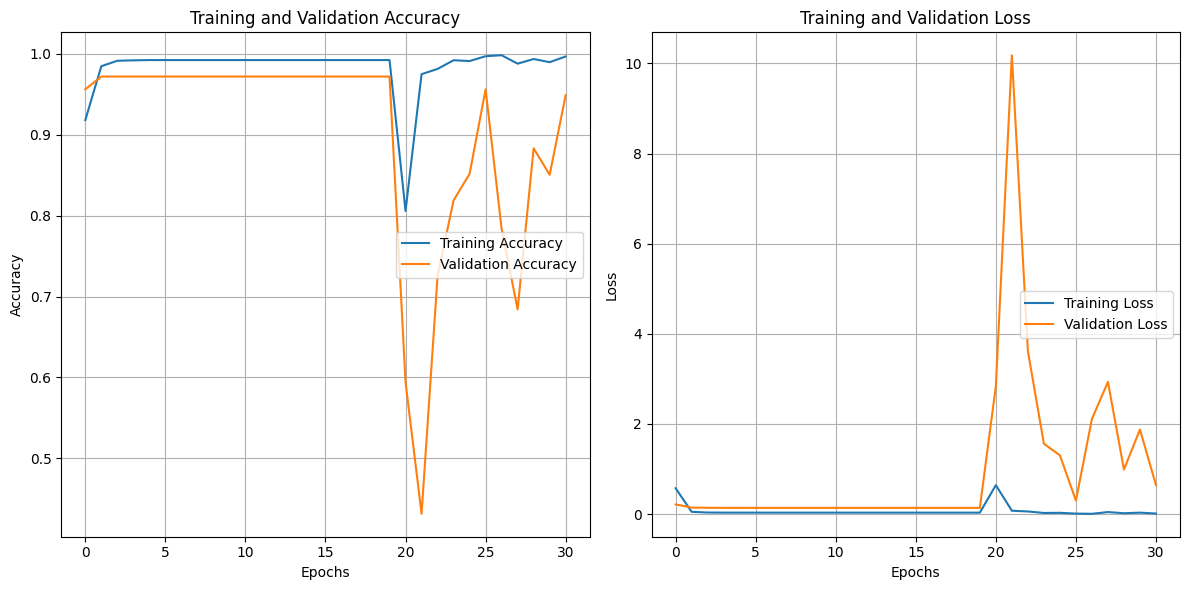

In [42]:
# Plot accuracy and loss on the same grid
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0.5))
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5))
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

In [53]:
# Reality and predictions from the test dataset
real_data = np.concatenate([labels.numpy() for _, labels in test_dataset]) 
predictions = np.concatenate([tf.where(model(X).numpy().flatten() < 0.5, 0, 1).numpy() for X, _ in test_dataset]) 

In [54]:
from sklearn.metrics import classification_report

In [55]:
# Print classification report
print("Classification Report:")
print(classification_report(real_data, predictions, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.45      0.47      0.46       238
     Class 1       0.49      0.47      0.48       262

    accuracy                           0.47       500
   macro avg       0.47      0.47      0.47       500
weighted avg       0.47      0.47      0.47       500



Class 0 = No bone Fracture

Class 1 = Fractured

<h2 style="color: #FF6347;">Testing the Model</h2>

In [59]:
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,984,709 (22.83 MB)

 Trainable params: 1,862,721 (7.11 MB)

 Non-trainable params: 396,544 (1.51 MB)

 Optimizer params: 3,725,444 (14.21 MB)

None


In [61]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = 'bone-fracture/Bone_Fracture_Binary_Classification/test/fractured/1-rotated3-rotated1-rotated1.jpg'
img_size = (160, 160)  # Match your model's input size

# Load and preprocess the image
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image

In [62]:
prediction = model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
[[2.0796533e-06]]


In [64]:
img_path = '/Users/selinwork/Documents/Ironhack/Ironhack_Week_6/project-4-cv/bone-fracture/Bone_Fracture_Binary_Classification/test/not fractured/6.jpg'
img_size = (160, 160)  # Match your model's input size

# Load and preprocess the image
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image

prediction = model.predict(img_array)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[2.5706643e-06]]


In [65]:
from PIL import Image

img = Image.open('/Users/selinwork/Documents/Ironhack/Ironhack_Week_6/project-4-cv/test_image.jpg')
img_resized = img.resize((160, 160))
img_resized.save('path_to_save_resized_image.jpg')

In [67]:
# Load and preprocess the image
img_path = '/Users/selinwork/Documents/Ironhack/Ironhack_Week_6/project-4-cv/test_image.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image

prediction = model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[2.8984343e-06]]
